# Exercise 1 — Visualizing Tail Behavior

Consider a random variable $X$ with a power-law tail:

$$
p(x) = \frac{\mu x_0^\mu}{x^{1+\mu}}, \quad x \ge x_0, \quad \mu > 0
$$

**Tasks:**

1. Pick $\mu = 0.5, 1.5, 3$ and $x_0 = 1$.  
2. Plot $p(x)$ on a **log-log scale** for each value of $\mu$.  
3. Observe how the slope of the tail changes as $\mu$ increases.  
4. Discuss which values of $\mu$ produce a **finite mean** and **finite variance**.  
5. Explain physically what a “fatter tail” implies for the probability of extreme events.  

**Goal:** Develop intuition for how the exponent $\mu$ controls the thickness of the tail and the likelihood of rare events.


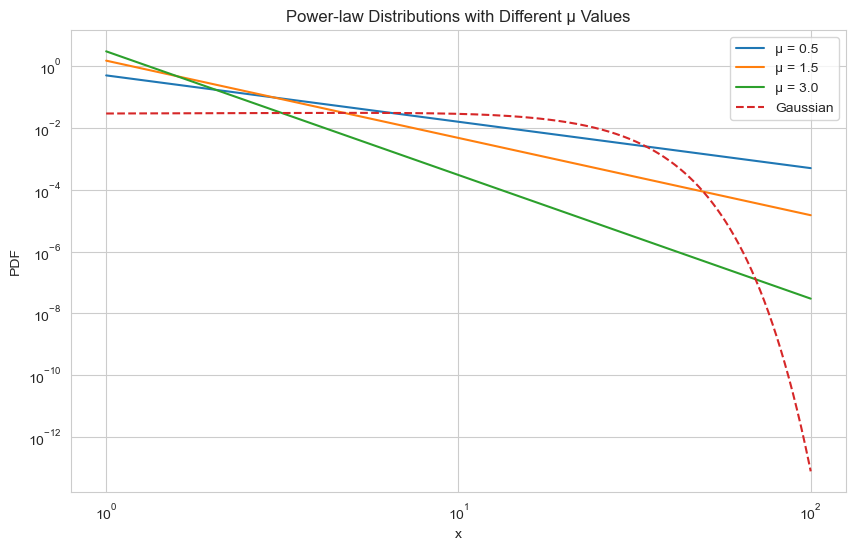

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x0 = 1
mu_values = np.array([0.5, 1.5, 3])

x_axis_values = np.linspace(x0, 100, 1000)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
for mu in mu_values:
    pdf_values = mu * x0**mu / x_axis_values**(1 + mu)
    plt.plot(x_axis_values, pdf_values, label=f'μ = {mu}')

# plot gaussian for comparison
mean = 5
std_dev = 13
gaussian_values = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_axis_values - mean) / std_dev) ** 2)
plt.plot(x_axis_values, gaussian_values, label='Gaussian', linestyle='--')

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Power-law Distributions with Different μ Values')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

As the exponent $\mu$ increases, the tail of the distribution becomes steeper in a log–log plot. Visually, the curve approaches a more vertical shape, which corresponds to a thinner tail. This thinning implies that the probability of extremely large events decreases more rapidly, making rare events progressively less likely as $\mu$ grows.

This behavior is directly connected to the existence of moments of the distribution. In particular, only for $\mu > 2$ does the variance become finite. When $\mu \le 2$, the integral defining the second moment diverges, signaling that fluctuations are dominated by rare but very large events rather than by typical ones.

From a physical perspective, a fat tail means that extreme events are not exponentially suppressed, unlike in a Gaussian distribution. As a result, extreme outcomes are not mere anomalies or statistical accidents, but an intrinsic feature of the system. In such regimes, a single realization can outweigh the combined contribution of many typical events, and the overall risk is governed by rare shocks rather than by small, frequent fluctuations.

# Exercise 2 — Sum of Random Variables with Fat Tails

Consider independent and identically distributed random variables $X_i$ drawn from a Pareto distribution

$$
p(x) = \frac{\mu x_0^\mu}{x^{1+\mu}}, \quad x \ge x_0
$$

with exponent $\mu > 0$ and $x_0=1$.

Define the sum of $n$ variables as

$$
S_n = \sum_{i=1}^{n} X_i .
$$

**Tasks:**

1. Fix the number of summands to $n = 100$.  
2. Study the distribution of $S_n$ for the following values of $\mu$:
   - $\mu > 2$
   - $1 < \mu < 2$
   - $\mu < 1$
3. For each case, plot the distribution of $S_n$ and analyze:
   - the shape of the central region,
   - the behavior of the tails.
4. Compare the typical scale of fluctuations of $S_n$ in the three regimes.
5. Discuss whether the sum is dominated by:
   - many small contributions, or
   - a single large realization.

**Goal:** Understand how the exponent $\mu$ controls the applicability of the Central Limit Theorem and how extreme events influence the sum of fat-tailed random variables.


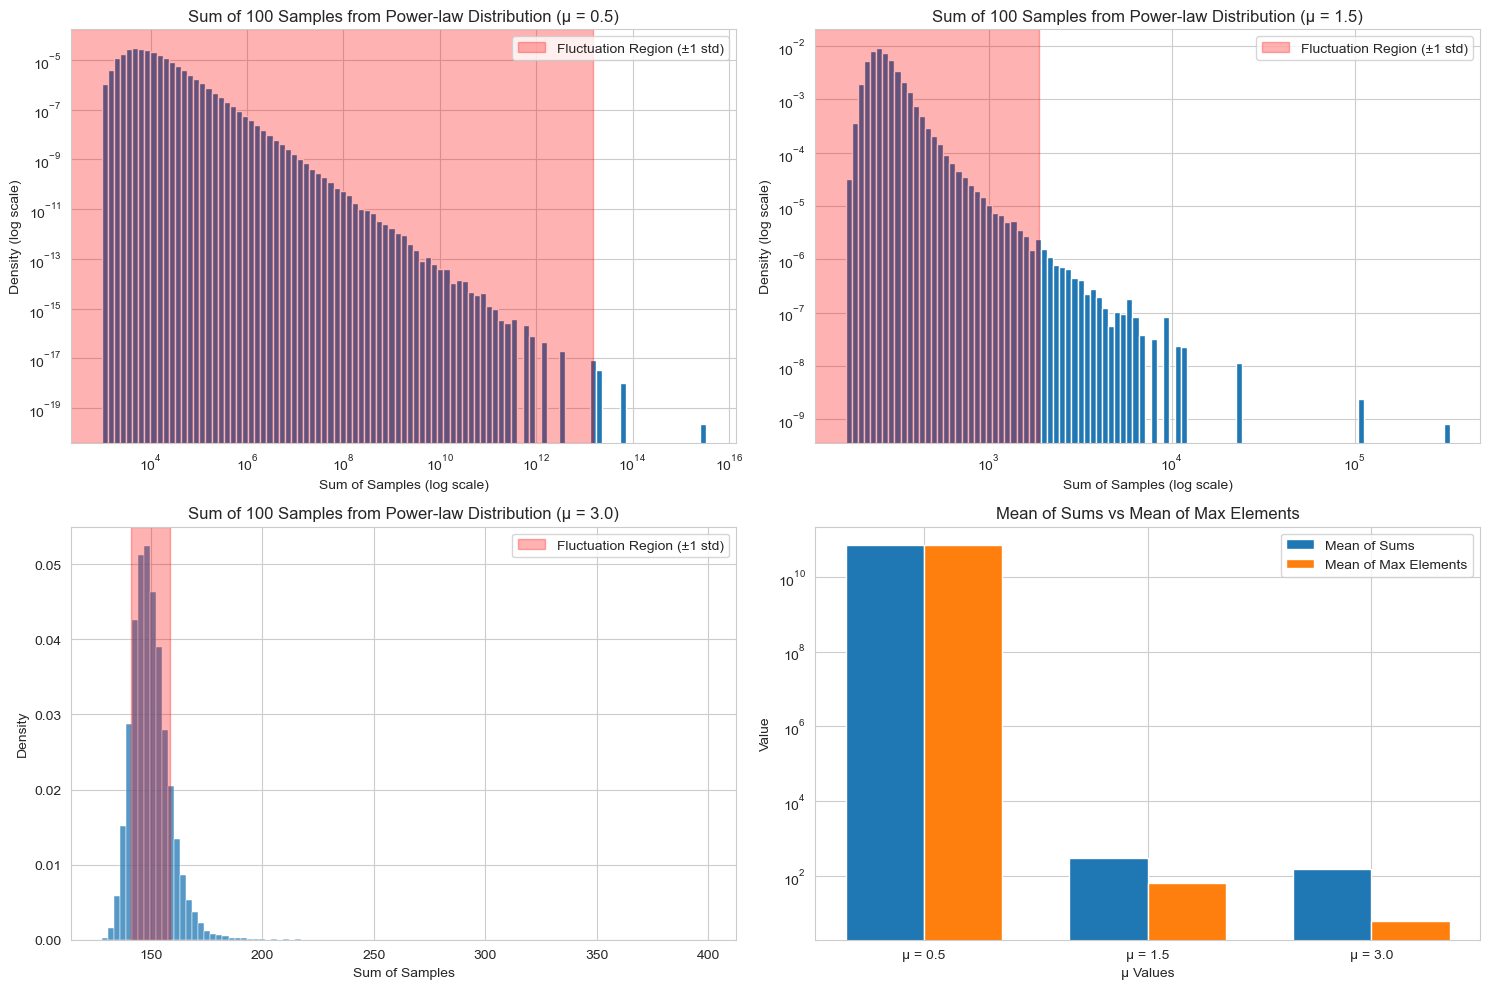

In [12]:
number_summands = 100
num_samples = 50000
x0 = 1

mu_values = np.array([0.5, 1.5, 3])
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
samples = {}
for i, mu in enumerate(mu_values, 1):
    samples[mu] = (np.random.pareto(mu, (num_samples, number_summands)) + 1) * x0
    sums = samples[mu].sum(axis=1)
    
    plt.subplot(2, 2, i)
    if mu > 2:
        sns.histplot(sums, bins=100, stat='density', kde=False)
        plt.xlabel('Sum of Samples')
        plt.ylabel('Density')
        plt.title(f'Sum of {number_summands} Samples from Power-law Distribution (μ = {mu})')
    else:
        # compute histogram with log bins
        log_bins = np.logspace(np.log10(sums.min()), np.log10(sums.max()), 100)
        plt.hist(sums, bins=log_bins, density=True)
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('Sum of Samples (log scale)')
        plt.ylabel('Density (log scale)')
        plt.title(f'Sum of {number_summands} Samples from Power-law Distribution (μ = {mu})')

    # highlight the fluctuation region
    mean_sum = sums.mean()
    std_sum = sums.std()
    plt.axvspan(mean_sum - std_sum, mean_sum + std_sum, color='red', alpha=0.3, label='Fluctuation Region (±1 std)')
    plt.legend()

# plot the mean value of the samples sum and the mean value for the max element in the samples for each mu
# so on the x axis put each mu and the hue is mean or max
plt.subplot(2, 2, 4)
mean_sums = [samples[mu].sum(axis=1).mean() for mu in mu_values]
max_sums = [samples[mu].max(axis=1).mean() for mu in mu_values]
x = np.arange(len(mu_values))
width = 0.35
plt.bar(x - width/2, mean_sums, width, label='Mean of Sums')
plt.bar(x + width/2, max_sums, width, label='Mean of Max Elements')
plt.xticks(x, [f'μ = {mu}' for mu in mu_values])
plt.xlabel('μ Values')
plt.ylabel('Value')
#log scale for y axis
plt.yscale('log')
plt.title('Mean of Sums vs Mean of Max Elements')
plt.legend()
plt.tight_layout()
plt.show()

For $\mu > 2$, the Pareto distribution has both a finite mean and a finite variance. As a result, the Central Limit Theorem applies. The distribution of the sum $S_n$ develops a Gaussian-like shape in its central region, as expected from the CLT. Although the tails of the distribution remain power-law at finite $n$, they are very weak and have a negligible impact on typical fluctuations. In this regime, the fluctuation scale $\Delta S_n$ grows as $\sqrt{n}$, indicating that the sum is dominated by the collective contribution of many small, independent terms.

When $1 < \mu < 2$, the second moment of the Pareto distribution diverges, violating a key assumption of the Central Limit Theorem. Consequently, the distribution of $S_n$ is no longer Gaussian, not even in the central region, and exhibits much fatter tails. The fluctuation scale now grows as $n^{1/\mu}$, which is faster than $\sqrt{n}$. This reflects a qualitative change in the nature of the sum: rare but very large realizations play a dominant role in determining its value.

For $\mu < 1$, even the mean of the distribution diverges. In this extreme regime, the sum $S_n$ is effectively governed by the largest term among the $X_i$. The distribution of $S_n$ therefore closely mirrors the distribution of the maximum, rather than arising from the accumulation of many contributions. The fluctuation scale still grows as $n^{1/\mu}$, but now this scaling reflects the dominance of a single extreme event rather than collective fluctuations.
